In [8]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
oil_prices = pd.read_csv('oil.csv')

In [145]:
oil_prices.tail()

,Year,Oil prices in constant 1997 dollars. 1870-1997
123,1993,17.15
124,1994,18.27
125,1995,19.40
126,1996,20.52
127,Oil prices in constant 1997 dollars. 1870-1997,NaN


In [10]:
oil_prices = oil_prices[~np.isnan(oil_prices[oil_prices.columns[1]])]

In [11]:
oil_prices.tail()

,Year,Oil prices in constant 1997 dollars. 1870-1997
122,1992,18.38
123,1993,17.15
124,1994,18.27
125,1995,19.40
126,1996,20.52


In [12]:
oil_prices.dtypes

Year                                               object
Oil prices in constant 1997 dollars. 1870-1997    float64
dtype: object

In [13]:
oil_prices = oil_prices.convert_objects(convert_dates='coerce')

C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


ValueError: Wrong number of dimensions. values.ndim != ndim [1 != 2]

In [14]:
oil_prices.rename(columns = {oil_prices.columns[1]: 'Oil_Price_1997_Dollars'},inplace=True)

In [15]:
oil_prices.head()

,Year,Oil_Price_1997_Dollars
0,1870,58.53
1,1871,49.09
2,1872,24.68
3,1873,16.71
4,1874,19.86


In [16]:
matplotlib.style.use('ggplot')

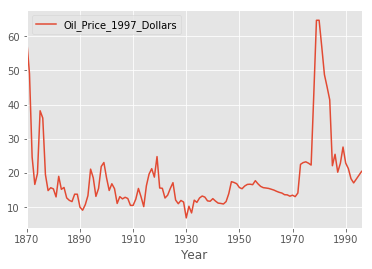

In [17]:
oil_prices.plot(x='Year',y='Oil_Price_1997_Dollars')

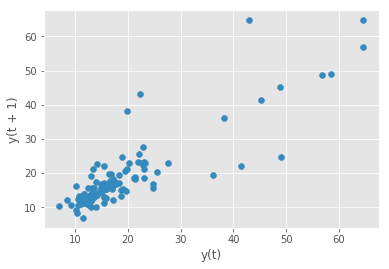

In [18]:
from pandas.plotting import lag_plot

lag_plot(oil_prices.Oil_Price_1997_Dollars)

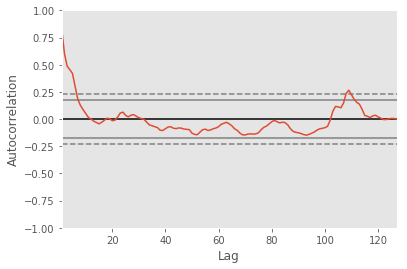

In [19]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(oil_prices['Oil_Price_1997_Dollars'])

In [20]:
car_crashes=pd.read_csv("car_crashes.csv")
car_crashes.Year=car_crashes.Year.astype(str)
car_crashes=car_crashes.convert_objects(convert_dates='coerce')

C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Wrong number of dimensions. values.ndim != ndim [1 != 2]

In [21]:
car_crashes.head()

,Year,Car_Crash_Fatalities_US
0,1900,36
1,1901,54
2,1902,79
3,1903,117
4,1904,172


In [22]:
car_crashes['Car_Crash_Fatalities_US']=car_crashes['Car_Crash_Fatalities_US']/1000

In [23]:
oil_prices_car_crashes = pd.merge(oil_prices,car_crashes,on='Year')

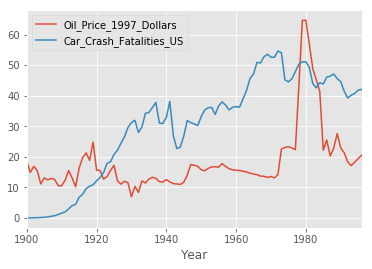

In [24]:
oil_prices_car_crashes.plot(x='Year')


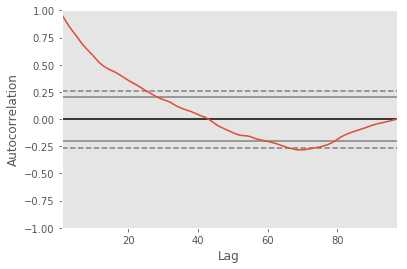

In [25]:
autocorrelation_plot(oil_prices_car_crashes[['Car_Crash_Fatalities_US','Oil_Price_1997_Dollars']])